In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 1.6 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 1.4 MB/s eta 0:00:00a 0:00:01
  Created wheel for peewee: filename=peewee-3.17.6-cp310-cp310-linux_x86_64.whl size=275728 sha256=ec0ac6d1ab7fff60fbd9a91015be794be35703446c861d208c0be06120c89c3a
  Stored in directory: /root/.cache/pip/wheels/4b/b9/b0/83d6e258e8f963f5ff111a2cd8c483ca59372a86e6a2535212
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
import pandas as pd

ticker = 'AAPL'
stock = yf.Ticker(ticker)


live_price = stock.history(period="1d", interval="1m")  
print(live_price)

df = pd.DataFrame(live_price)

                                 Open        High         Low       Close  \
Datetime                                                                    
2024-09-16 09:30:00-04:00  216.550003  216.772995  215.539993  216.300003   
2024-09-16 09:31:00-04:00  216.289993  216.520004  215.820007  216.130005   
2024-09-16 09:32:00-04:00  216.100006  216.100006  215.160004  215.309998   
2024-09-16 09:33:00-04:00  215.300003  215.320007  214.070007  214.250000   
2024-09-16 09:34:00-04:00  214.279999  214.520004  213.919998  214.369995   
...                               ...         ...         ...         ...   
2024-09-16 12:24:00-04:00  215.240005  215.257599  215.149994  215.225006   
2024-09-16 12:25:00-04:00  215.220001  215.359894  215.220001  215.260300   
2024-09-16 12:26:00-04:00  215.264999  215.439896  215.250000  215.429993   
2024-09-16 12:27:00-04:00  215.425003  215.470001  215.290100  215.375000   
2024-09-16 12:28:00-04:00  215.376007  215.376007  215.376007  215.376007   

In [4]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2024-09-16 09:30:00-04:00,216.550003,216.772995,215.539993,216.300003,4444185,0.0,0.0
2024-09-16 09:31:00-04:00,216.289993,216.520004,215.820007,216.130005,547244,0.0,0.0
2024-09-16 09:32:00-04:00,216.100006,216.100006,215.160004,215.309998,707192,0.0,0.0
2024-09-16 09:33:00-04:00,215.300003,215.320007,214.070007,214.250000,1173479,0.0,0.0
2024-09-16 09:34:00-04:00,214.279999,214.520004,213.919998,214.369995,777721,0.0,0.0


In [6]:
from datetime import datetime, timedelta


def get_stock_data(company_names, tickers):
    end_date = datetime.now()
    start_date = end_date - timedelta(days=30*7)  # Approx. 7 months

    company_data = {}

    
    for company, ticker in zip(company_names, tickers):
        stock = yf.Ticker(ticker)
        
        
        stock_data = stock.history(start=start_date, end=end_date, interval='1d')
        
        
        stock_data['Company'] = company
        
        
        company_data[company] = stock_data

    return company_data


tickers = input("Enter company tickers (comma-separated): ").split(',')
company_names = input("Enter company names corresponding to tickers (comma-separated): ").split(',')


if len(tickers) != len(company_names):
    print("Error: Number of company names and tickers must be the same.")
else:
    
    stock_data = get_stock_data(company_names, tickers)

   
    for company in company_names:
        print(f"\nData for {company}:")
        print(stock_data[company].head())
        exec(f"{company.lower()}_data = stock_data['{company}']")

Enter company tickers (comma-separated):  AAPL,MSFT,GOOGL,AMZN
Enter company names corresponding to tickers (comma-separated):  Apple,Microsoft,Google,Amazon



Data for Apple:
                                 Open        High         Low       Close  \
Date                                                                        
2024-02-20 00:00:00-05:00  181.333865  181.972259  179.548363  181.104446   
2024-02-21 00:00:00-05:00  181.483497  182.431111  180.206710  181.862549   
2024-02-22 00:00:00-05:00  183.019628  184.495926  182.002198  183.907394   
2024-02-23 00:00:00-05:00  184.545785  184.575708  181.772761  182.062042   
2024-02-26 00:00:00-05:00  181.782752  182.301436  180.196729  180.705460   

                             Volume  Dividends  Stock Splits Company  
Date                                                                  
2024-02-20 00:00:00-05:00  53665600        0.0           0.0   Apple  
2024-02-21 00:00:00-05:00  41529700        0.0           0.0   Apple  
2024-02-22 00:00:00-05:00  52292200        0.0           0.0   Apple  
2024-02-23 00:00:00-05:00  45119700        0.0           0.0   Apple  
2024-02-26 00:00:

In [7]:
apple_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
Date,,,,,,,,
2024-02-20 00:00:00-05:00,181.333865,181.972259,179.548363,181.104446,53665600,0.0,0.0,Apple
2024-02-21 00:00:00-05:00,181.483497,182.431111,180.206710,181.862549,41529700,0.0,0.0,Apple
2024-02-22 00:00:00-05:00,183.019628,184.495926,182.002198,183.907394,52292200,0.0,0.0,Apple
2024-02-23 00:00:00-05:00,184.545785,184.575708,181.772761,182.062042,45119700,0.0,0.0,Apple
2024-02-26 00:00:00-05:00,181.782752,182.301436,180.196729,180.705460,40867400,0.0,0.0,Apple


In [8]:
amazon_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
Date,,,,,,,,
2024-02-20 00:00:00-05:00,167.830002,168.710007,165.740005,167.080002,41980300,0.0,0.0,Amazon
2024-02-21 00:00:00-05:00,168.940002,170.229996,167.139999,168.589996,44575600,0.0,0.0,Amazon
2024-02-22 00:00:00-05:00,173.100006,174.800003,171.770004,174.580002,55392400,0.0,0.0,Amazon
2024-02-23 00:00:00-05:00,174.279999,175.750000,173.699997,174.990005,59715200,0.0,0.0,Amazon
2024-02-26 00:00:00-05:00,175.699997,176.369995,174.259995,174.729996,44368600,0.0,0.0,Amazon


In [9]:
apple_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,145.000000,145.000000,145.000000,145.000000,1.450000e+02,145.000000,145.0
mean,197.521080,199.492871,195.628910,197.569423,6.165020e+07,0.003448,0.0
std,22.824940,23.100085,22.292642,22.812900,3.001160e+07,0.029259,0.0
min,164.935118,165.982480,163.668309,164.585999,3.029900e+07,0.000000,0.0
25%,173.822762,176.166868,172.067173,173.064667,4.458710e+07,0.000000,0.0
50%,192.676966,194.764561,191.927834,192.896713,5.248870e+07,0.000000,0.0
75%,220.570007,221.889999,217.458296,220.820007,6.858770e+07,0.000000,0.0
max,236.206595,236.955728,232.820515,234.548523,2.464214e+08,0.250000,0.0


In [10]:
apple_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145 entries, 2024-02-20 00:00:00-05:00 to 2024-09-16 00:00:00-04:00
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          145 non-null    float64
 1   High          145 non-null    float64
 2   Low           145 non-null    float64
 3   Close         145 non-null    float64
 4   Volume        145 non-null    int64  
 5   Dividends     145 non-null    float64
 6   Stock Splits  145 non-null    float64
 7   Company       145 non-null    object 
dtypes: float64(6), int64(1), object(1)
memory usage: 10.2+ KB


Enter the ticker symbols of 4 companies (separated by commas):  AAPL,MSFT,GOOGL,AMZN


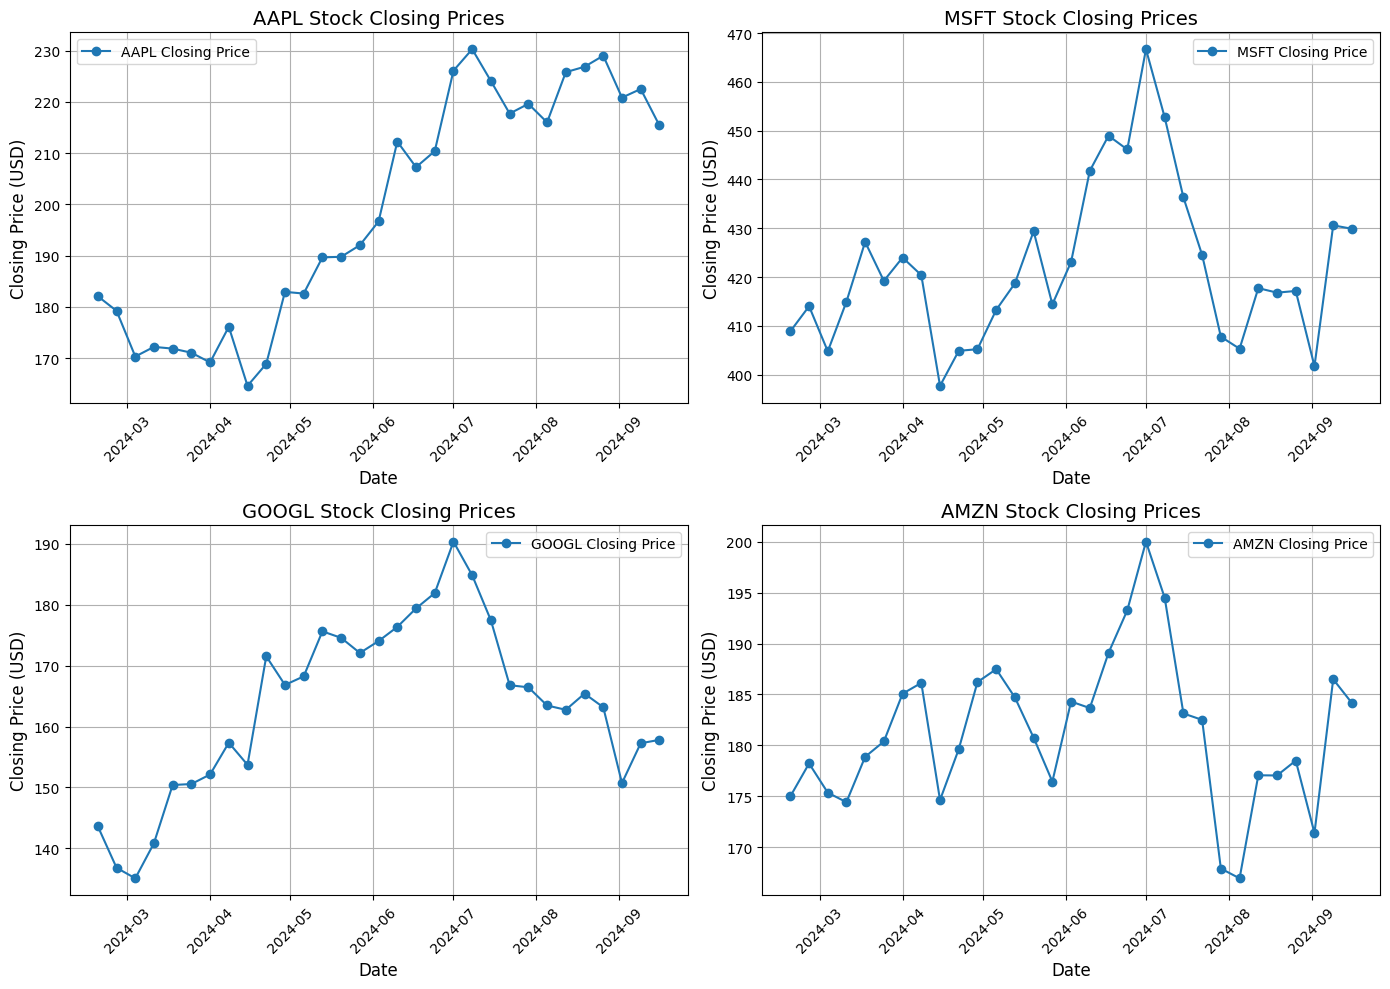

In [11]:

def get_stock_data(company_names):
    end_date = datetime.now()
    start_date = end_date - timedelta(days=30 * 7)  # Last 7 months

    company_data = {}
    
    for company in company_names:
        ticker = yf.Ticker(company)
        stock_data = ticker.history(start=start_date, end=end_date, interval='1wk')
        company_data[company] = stock_data
    
    return company_data


def plot_stock_data(company_data, companies):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))  
    axes = axes.flatten()  
    
    for i, company in enumerate(companies):
        axes[i].plot(company_data[company].index, company_data[company]['Close'], label=f'{company} Closing Price', marker='o')
        axes[i].set_title(f'{company} Stock Closing Prices', fontsize=14)
        axes[i].set_xlabel('Date', fontsize=12)
        axes[i].set_ylabel('Closing Price (USD)', fontsize=12)
        axes[i].legend()
        axes[i].grid(True)
        axes[i].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

input_companies = input("Enter the ticker symbols of 4 companies (separated by commas): ").split(',')


input_companies = [company.strip() for company in input_companies][:4]


stock_data = get_stock_data(input_companies)

# Plot stock data for the input companies
plot_stock_data(stock_data, input_companies)

In [12]:
class stock_analyse:
    def __init__(self, companies):
        self.companies = companies
        self.company_data = {}
        self.start_date = datetime.now() - timedelta(days=30*7)
        self.end_date = datetime.now() 

    def export_data(self):
        for company in self.companies:
            ticker = yf.Ticker(company)
            stock_data = ticker.history(start=self.start_date, end=self.end_date, interval='1wk')
            self.company_data[company] = stock_data

    def plot_graph(self):
        num_companies = len(self.companies)
        num_rows = (num_companies + 1) // 2 
        fig, axes = plt.subplots(num_rows, 2, figsize=(14, 5*num_rows)) 
        
        axes = axes.flatten() if num_companies > 1 else [axes]
    
        for i, company in enumerate(self.companies):
            axes[i].plot(self.company_data[company].index, self.company_data[company]['Close'], label=f'{company} Closing Price', marker='o')
            axes[i].set_title(f'{company} Stock Closing Prices', fontsize=14)
            axes[i].set_xlabel('Date', fontsize=12)
            axes[i].set_ylabel('Closing Price (USD)', fontsize=12)
            axes[i].legend()
            axes[i].grid(True)
            axes[i].tick_params(axis='x', rotation=45)
        
        for j in range(num_companies, len(axes)):
            fig.delaxes(axes[j])
        
        plt.tight_layout()
        plt.show()

    def plot_volume(self):
        num_companies = len(self.companies)
        num_rows = (num_companies + 1) // 2 
        fig, axes = plt.subplots(num_rows, 2, figsize=(14, 5*num_rows)) 
        
        axes = axes.flatten() if num_companies > 1 else [axes]
    
        for i, company in enumerate(self.companies):
            axes[i].plot(self.company_data[company].index, self.company_data[company]['Volume'], label=f'{company} Volume', marker='o')
            axes[i].set_title(f'{company} Trading Volume', fontsize=14)
            axes[i].set_xlabel('Date', fontsize=12)
            axes[i].set_ylabel('Volume', fontsize=12)
            axes[i].legend()
            axes[i].grid(True)
            axes[i].tick_params(axis='x', rotation=45)
        
        for j in range(num_companies, len(axes)):
            fig.delaxes(axes[j])
        
        plt.tight_layout()
        plt.show()

Enter the ticker symbols of companies (separated by commas):  AAPL,MSFT,GOOGL,AMZN


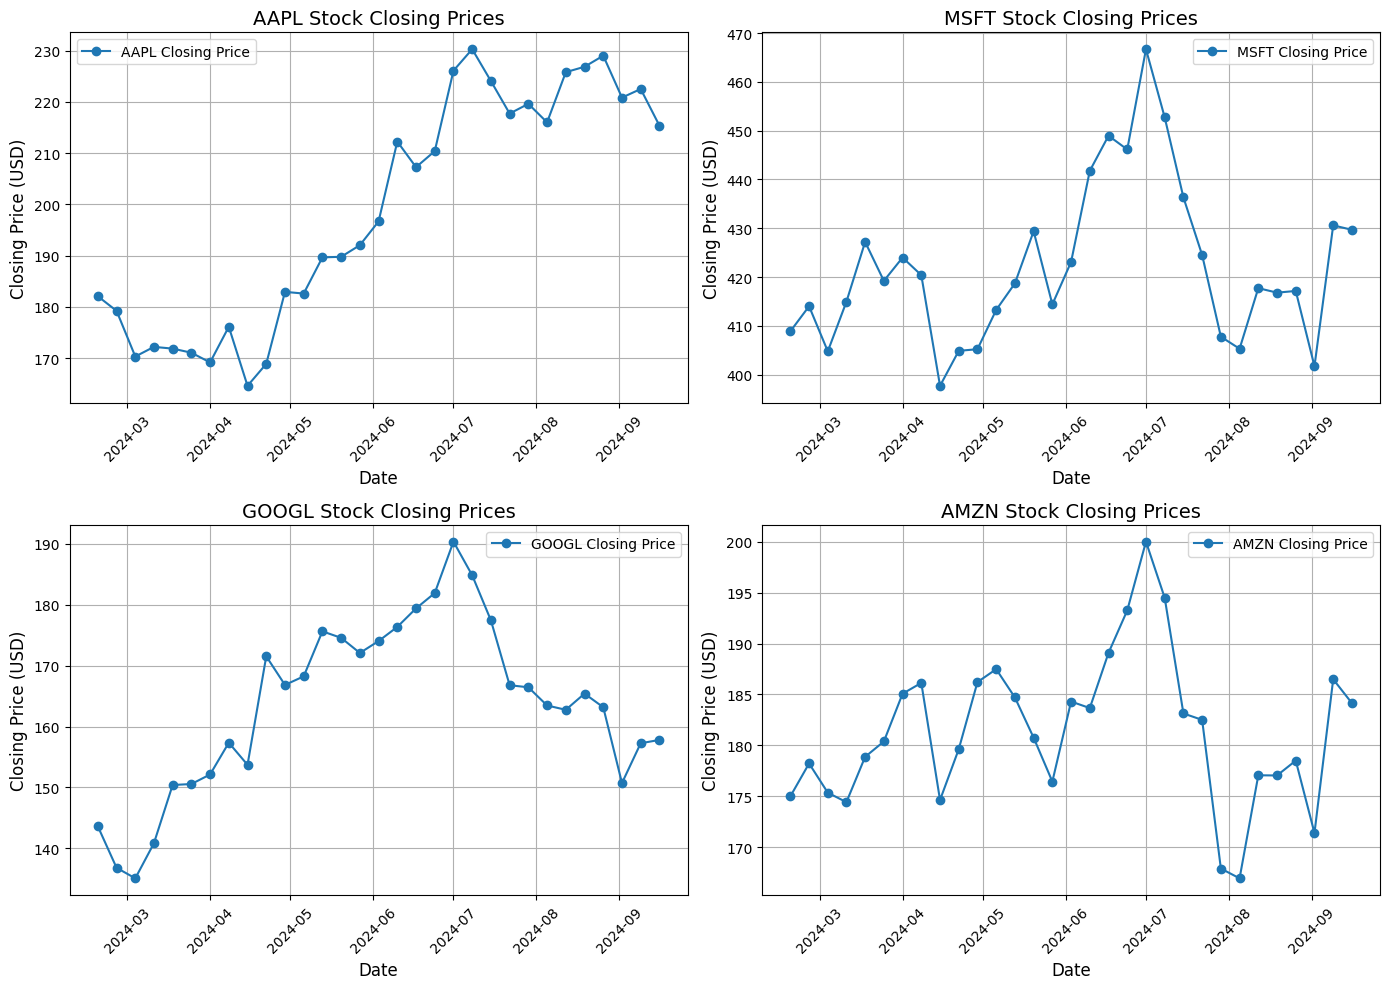

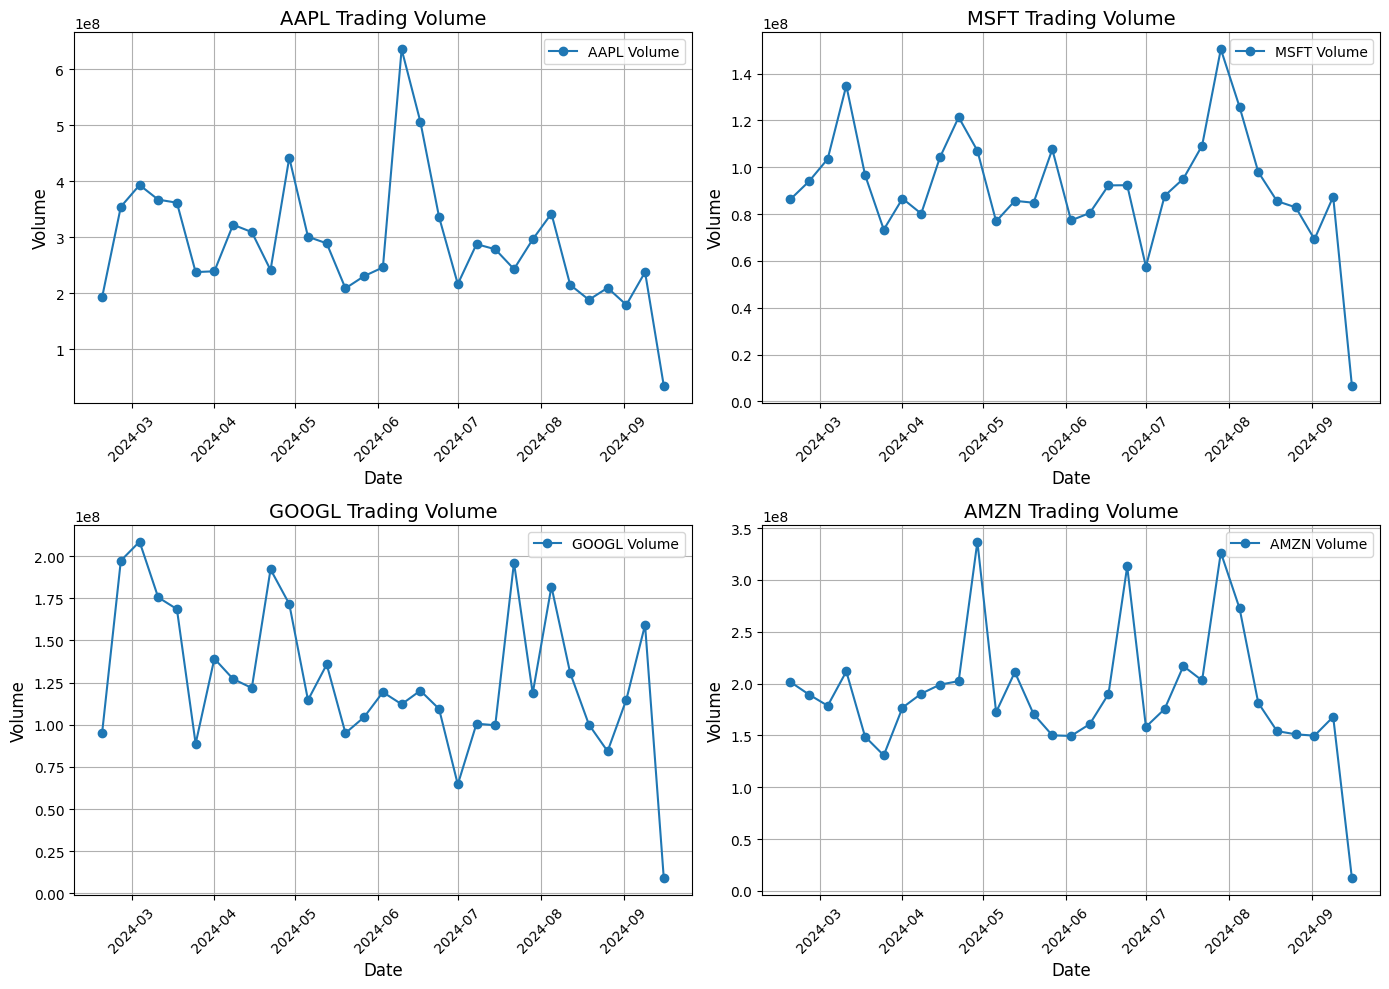

In [13]:
if __name__ == "__main__":
    input_companies = input("Enter the ticker symbols of companies (separated by commas): ").split(',')
    input_companies = [company.strip() for company in input_companies]
    
    
    analyzer = stock_analyse(input_companies)
    
   
    analyzer.export_data()
    analyzer.plot_graph()
    analyzer.plot_volume()

In [14]:
class stock_graphs:
    def __init__(self, companies):
        self.companies = companies
        self.company_data = {}
        self.ma_days=[5,10,15]
        self.start_date = datetime.now() - timedelta(days=30*7)
        self.end_date = datetime.now()
    
    def export_data(self):
        for company in self.companies:
            ticker = yf.Ticker(company)
            stock_data = ticker.history(start=self.start_date, end=self.end_date, interval='1d')
            for ma in self.ma_days:
                stock_data[f"MA for {ma} days"] = stock_data['Close'].rolling(window=ma).mean()
            self.company_data[company] = stock_data
            
        
    def plot_moving_averages(self):
        num_companies = len(self.companies)
        num_rows = (num_companies + 1) // 2  
        num_cols = 2 
        
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
        if num_companies == 1:
            axes = [axes]  
        else:
            axes = axes.flatten()
        for i, company in enumerate(self.companies):
            if i < len(axes):
                data = self.company_data.get(company)
                if data is not None:
                    data[['Close'] + [f"MA for {ma} days" for ma in self.ma_days]].plot(ax=axes[i])
                    axes[i].set_title(company)
        
      
        for j in range(num_companies, len(axes)):
            fig.delaxes(axes[j])
        
        fig.tight_layout()
        plt.show()
        
    def per_change(self):
    
        for company in self.companies:
            data = self.company_data.get(company)
            if data is not None:
                data['Daily Return'] = data['Close'].pct_change()  # Percentage change calculation

        num_companies = len(self.companies)
        num_rows = (num_companies + 1) // 2  
        num_cols = 2 

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
        if num_companies == 1:
            axes = [axes]  
        else:
            axes = axes.flatten()

        for i, company in enumerate(self.companies):
            if i < len(axes):
                data = self.company_data.get(company)
                if data is not None:
                    axes[i].plot(data.index, data['Daily Return'], label=f'{company} Daily Return', marker='o')
                    axes[i].set_title(f'{company} Daily Return', fontsize=14)
                    axes[i].set_xlabel('Date', fontsize=12)
                    axes[i].set_ylabel('Daily Return', fontsize=12)
                    axes[i].legend()
                    axes[i].grid(True)
                    axes[i].tick_params(axis='x', rotation=45)

        for j in range(num_companies, len(axes)):
            fig.delaxes(axes[j])

        fig.tight_layout()
        plt.show()


Enter the ticker symbols of companies (separated by commas):  AAPL,MSFT,GOOGL,AMZN


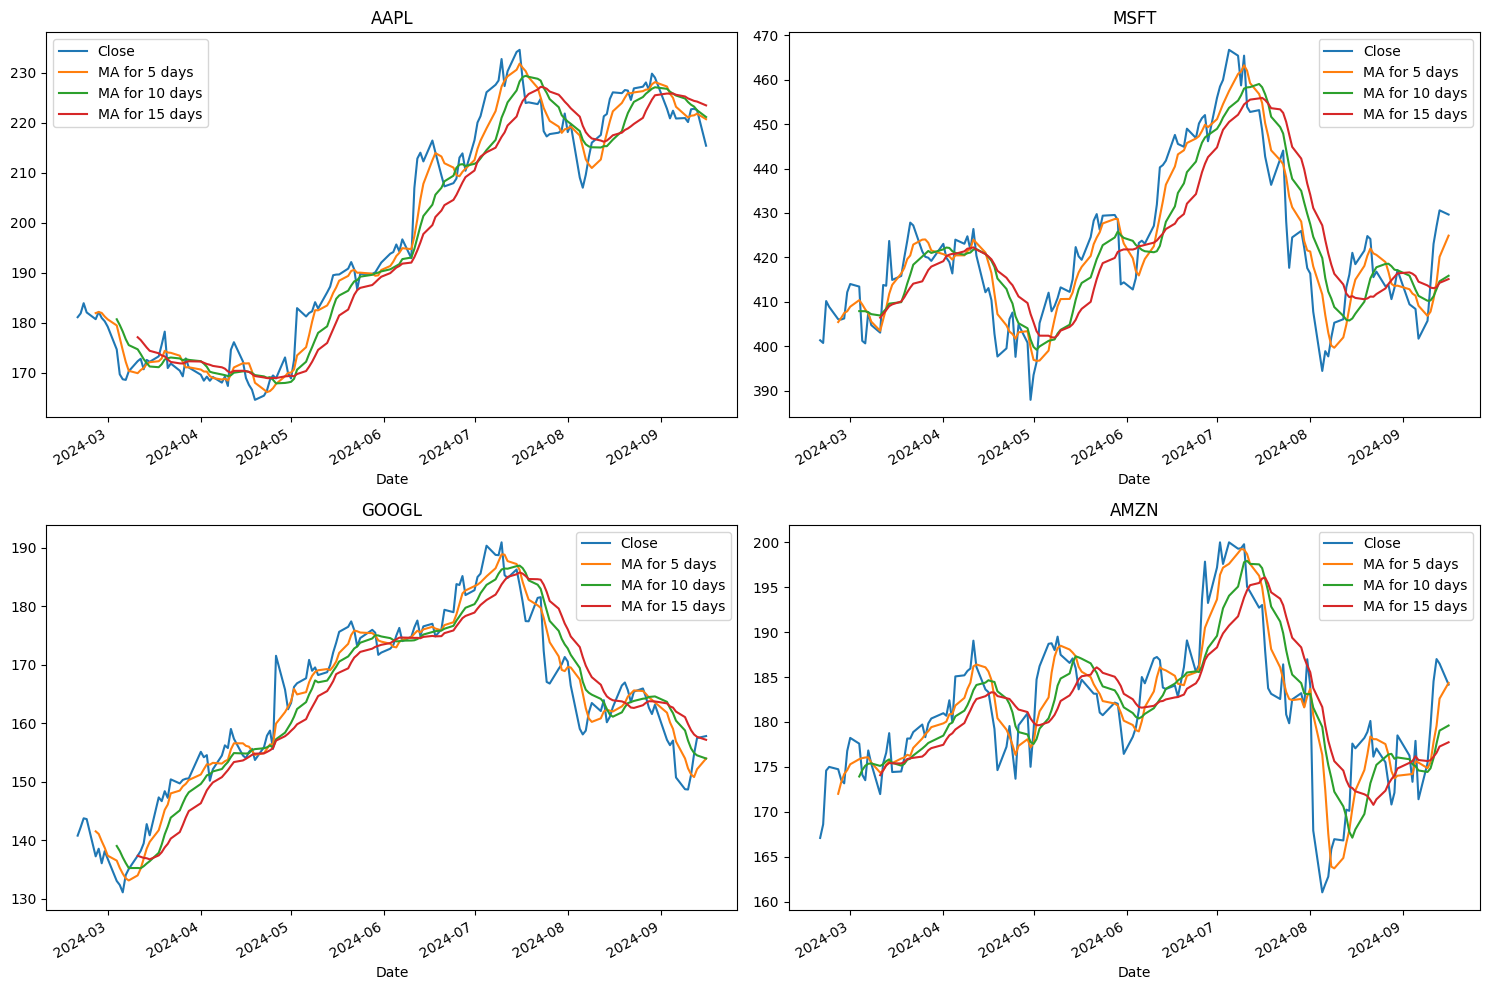

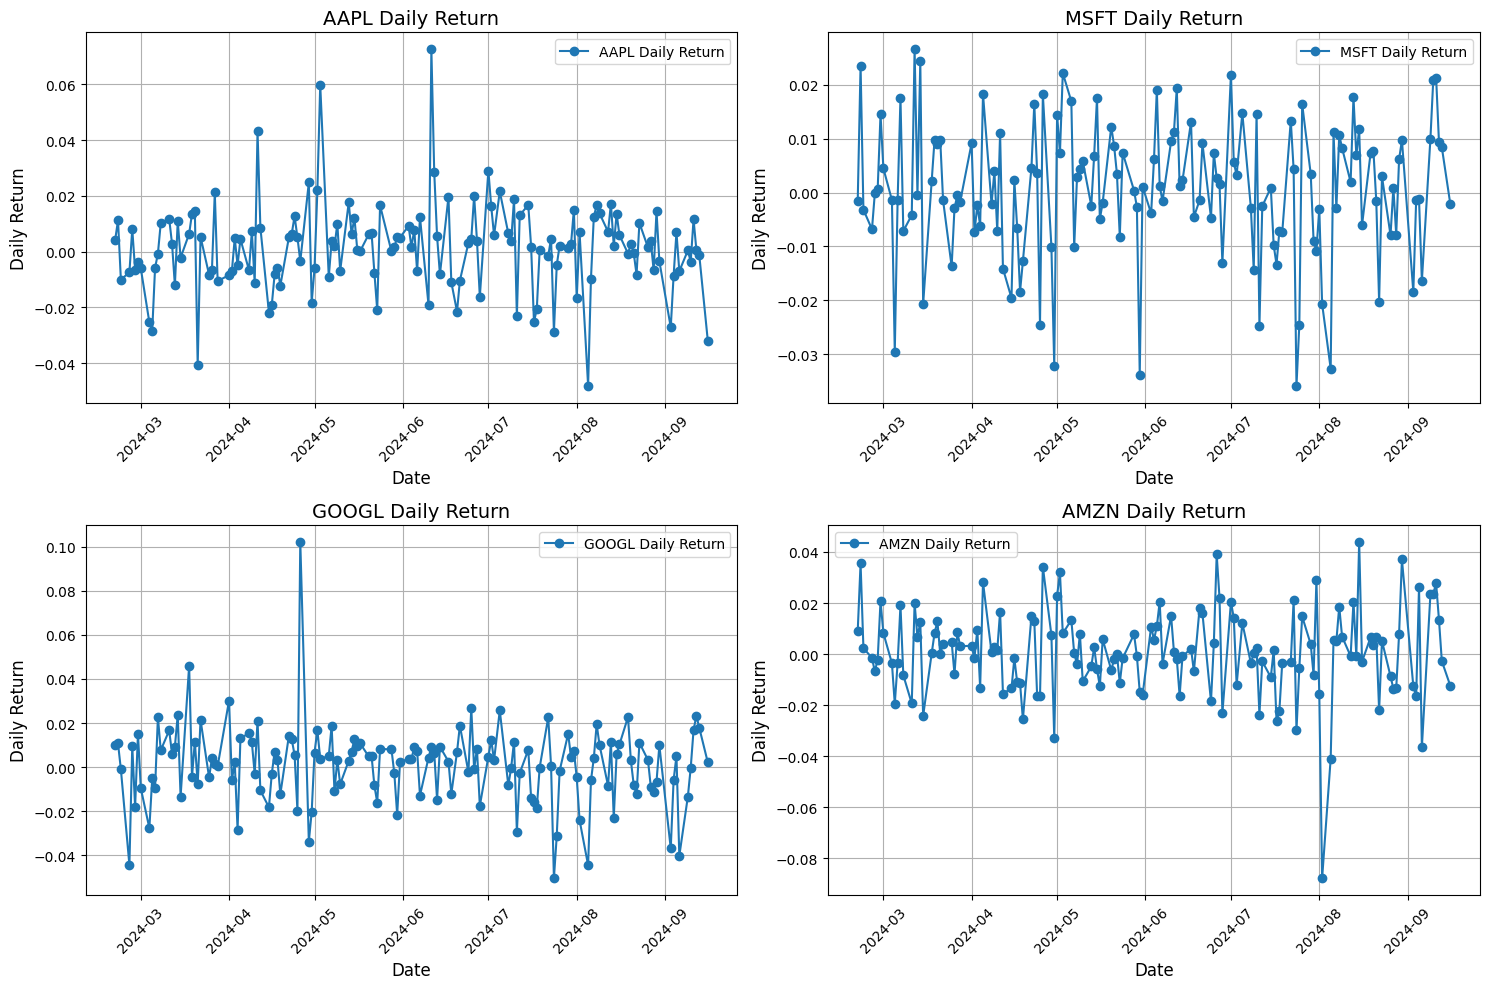

In [15]:
if __name__ == "__main__":
    input_companies = input("Enter the ticker symbols of companies (separated by commas): ").split(',')
    input_companies = [company.strip() for company in input_companies]
    
    
    analyzer = stock_graphs(input_companies)
    
    analyzer.export_data()
    analyzer.plot_moving_averages()
    analyzer.per_change()

In [16]:
class stock_corr:
    def __init__(self, companies):
        self.companies = companies
        self.company_data = {}
        self.ma_days=[5,10,15]
        self.start_date = datetime.now() - timedelta(days=30*7)
        self.end_date = datetime.now()
        self.correlation_matrix=[]
    
    def export_data(self):
        for company in self.companies:
            ticker = yf.Ticker(company)
            stock_data = ticker.history(start=self.start_date, end=self.end_date, interval='1d')
            self.company_data[company] = stock_data
    def co_relation(self):
        combine_data=pd.DataFrame()
       
        for company in self.companies:
            data=self.company_data.get(company)
            if data is not None:
                combine_data[company]=data['Close']
                
        combine_data = combine_data.dropna()
        
        correlation_matrix = combine_data.corr()
        
        print(correlation_matrix)
    
  
        import seaborn as sns
        import matplotlib.pyplot as plt
       
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
        plt.title('Correlation Matrix of Stock Prices')
        plt.show()
            
    def plot_pairplot(self):
    
        plot_data = pd.DataFrame()
        for company in self.companies:
            data = self.company_data.get(company)
            if data is not None:
                plot_data[company] = data['Close']
                plot_data['Date'] = data.index

        plot_data = plot_data.reset_index(drop=True)  

    
        sns.pairplot(plot_data, kind='reg')
        plt.show()
    
    def kde_plot(self):
    
        plot_data = pd.DataFrame()
        for company in self.companies:
            data = self.company_data.get(company)
            if data is not None:
                plot_data[company] = data['Close']
                plot_data['Date'] = data.index

        plot_data = plot_data.reset_index(drop=True)  

    
        return_fig = sns.PairGrid(plot_data.dropna())


        return_fig.map_upper(plt.scatter, color='purple')

 

        return_fig.map_lower(sns.kdeplot, cmap='cool_d')


        return_fig.map_diag(plt.hist, bins=30)
        plt.show()


Enter the ticker symbols of companies (separated by commas):  AAPL,MSFT,GOOGL,AMZN


           AAPL      MSFT     GOOGL      AMZN
AAPL   1.000000  0.497277  0.576397  0.203062
MSFT   0.497277  1.000000  0.687084  0.783707
GOOGL  0.576397  0.687084  1.000000  0.649109
AMZN   0.203062  0.783707  0.649109  1.000000


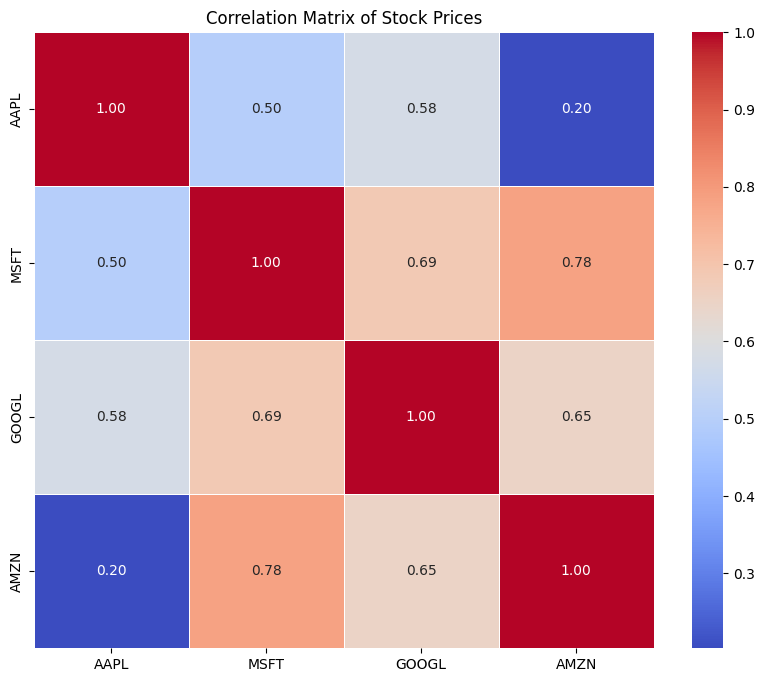

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

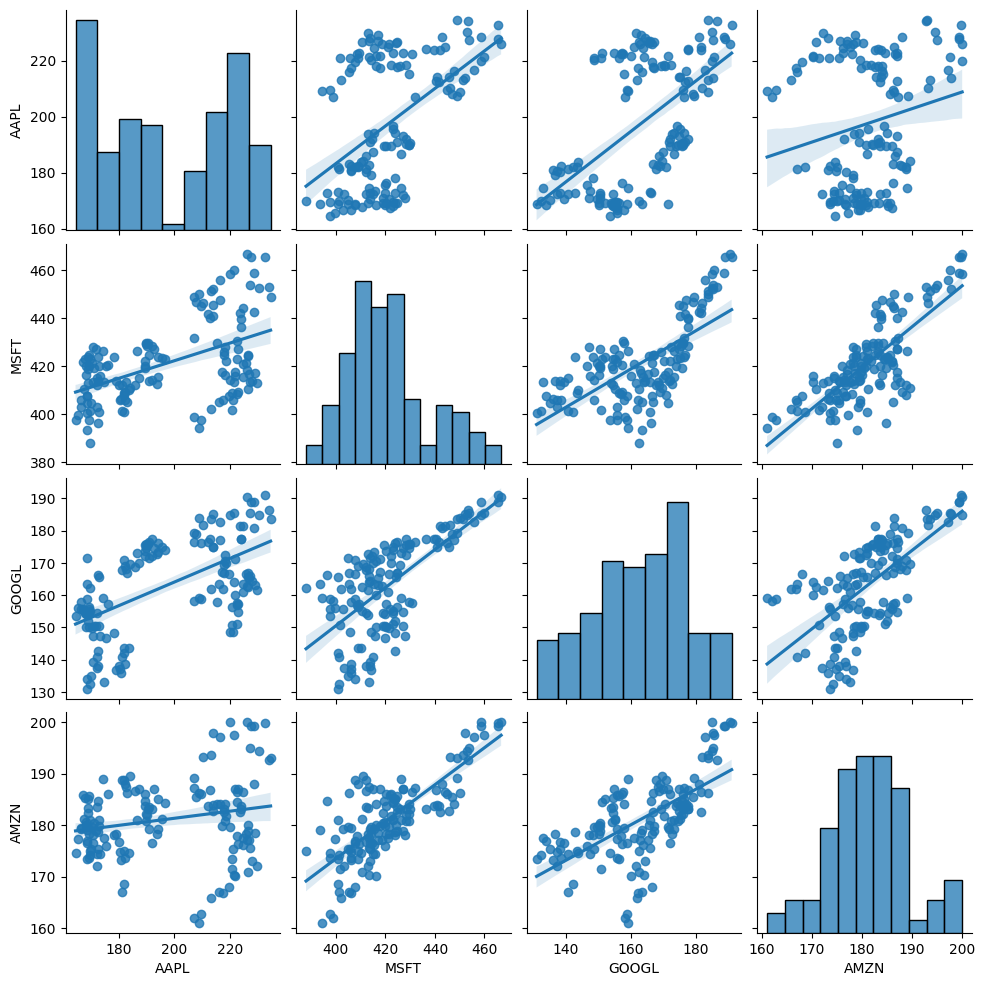

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

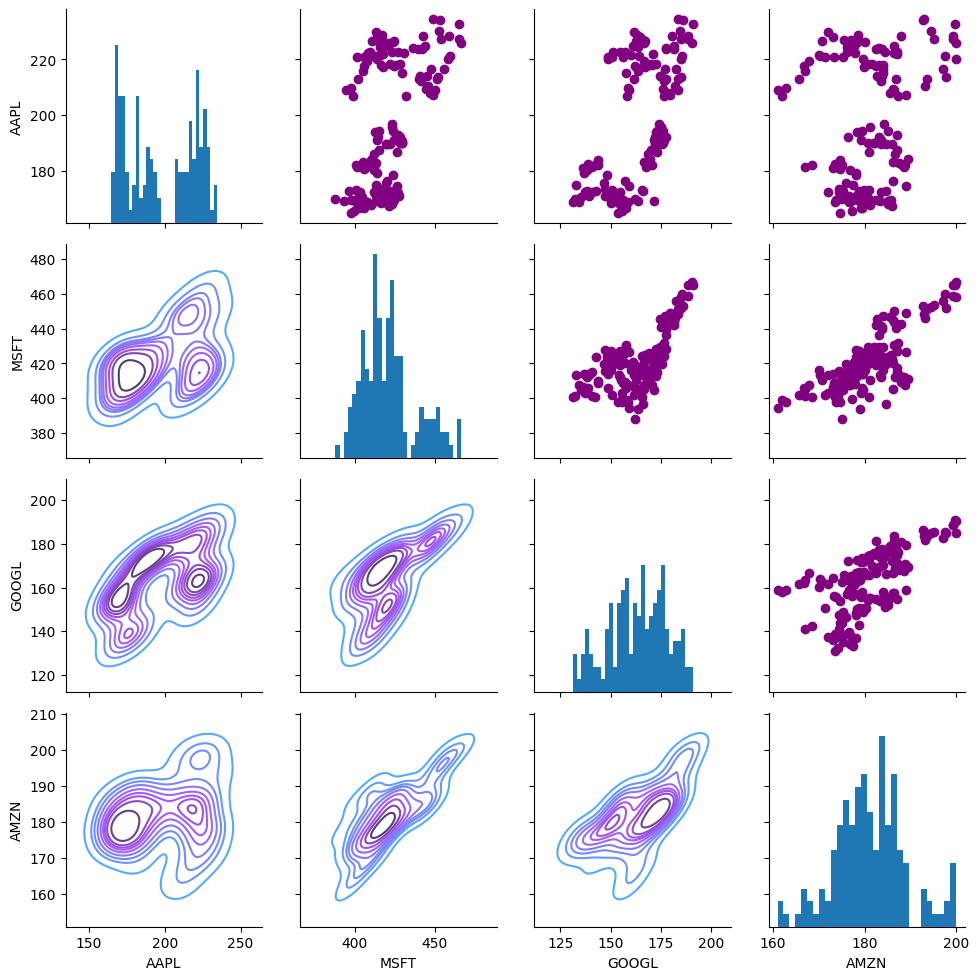

In [17]:
if __name__ == "__main__":
    input_companies = input("Enter the ticker symbols of companies (separated by commas): ").split(',')
    input_companies = [company.strip() for company in input_companies]
    
    
    analyzer = stock_corr(input_companies)
    
    analyzer.export_data()
    analyzer.co_relation()
    analyzer.plot_pairplot()
    analyzer.kde_plot()

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from datetime import datetime, timedelta
from keras.layers import Dropout

class stock_prediction:
    def __init__(self, companies):
        self.companies = companies
        self.company_data = {}
        self.start_date = datetime.now() - timedelta(days=365*5)
        self.end_date = datetime.now()

    def export_data(self):
        for company in self.companies:
            ticker = yf.Ticker(company)
            stock_data = ticker.history(start=self.start_date, end=self.end_date, interval='1d')
            self.company_data[company] = stock_data

    def comparison_plot(self):
        combined_data = pd.DataFrame()
        for company in self.companies:
            data = self.company_data.get(company)
            if data is not None:
                combined_data[company] = data['Close']
        
        combined_data = combined_data.reset_index()
        combined_data.rename(columns={'index': 'Date'}, inplace=True)
        
        plt.figure(figsize=(16,6))
        plt.title('Close Price History')
        for company in self.companies:
            plt.plot(combined_data['Date'], combined_data[company], label=company)
        plt.xlabel('Date', fontsize=18)
        plt.ylabel('Close Price USD ($)', fontsize=18)
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.show()
        
    def prediction_stock(self):
        for company in self.companies:
            combined_data = pd.DataFrame()
            data = self.company_data.get(company)
            if data is not None:
                combined_data[company] = data['Close']
    
            
            valid_data = combined_data.reset_index()
            valid_data.rename(columns={'index': 'Date'}, inplace=True)

            if company not in valid_data.columns:
                print(f"'{company}' column not found after reset_index")
                continue

            dataset = valid_data[company].values.reshape(-1, 1)
        
            split_idx = int(len(dataset) * 0.8)
            train_data = dataset[:split_idx]
            test_data = dataset[split_idx:]

            scaler = MinMaxScaler(feature_range=(0, 1))
            scaled_train_data = scaler.fit_transform(train_data)
            scaled_test_data = scaler.transform(test_data)

            x_train, y_train = [], []
            for i in range(60, len(scaled_train_data)):
                x_train.append(scaled_train_data[i-60:i, 0])
                y_train.append(scaled_train_data[i, 0])

            if len(x_train) == 0:
                print(f"Training data for {company} is too small. Increase the size of the dataset.")
                continue

            x_train, y_train = np.array(x_train), np.array(y_train)
            x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

            model = Sequential()
            model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
             
            model.add(LSTM(64, return_sequences=False))
            
            model.add(Dense(25))
            model.add(Dense(1))
            
            model.compile(optimizer='adam', loss='mean_squared_error')
            model.fit(x_train, y_train, batch_size=1, epochs=10)

            x_test, y_test = [], []
            for i in range(60, len(scaled_test_data)):
                x_test.append(scaled_test_data[i-60:i, 0])
                y_test.append(scaled_test_data[i, 0])

            x_test, y_test = np.array(x_test), np.array(y_test)

            if x_test.shape[0] == 0:
                print(f"Not enough test data for {company} to create sequences for LSTM input. Increase the dataset size.")
                continue

            x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

            predictions = model.predict(x_test)

            predictions = scaler.inverse_transform(predictions)
            y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
            test_dates = valid_data['Date'][split_idx + 60:].values
            
            plt.figure(figsize=(16,6))
            plt.plot(test_dates,y_test, label=f'Actual Prices - {company}', color='blue')
            plt.plot(test_dates,predictions, label=f'Predicted Prices - {company}', color='red', linestyle='--')
            plt.xlabel('Time', fontsize=18)
            plt.ylabel('Price USD ($)', fontsize=18)
            plt.title(f'{company} Stock Price Prediction vs Actual Prices')
            plt.legend()
            plt.show()
            
            last_60_days = scaled_test_data[-60:]  # Get the last 60 days from the test data
            future_predictions = []
            predict_next_days=15
            for day in range(predict_next_days):
            
                input_seq = last_60_days.reshape(1, last_60_days.shape[0], 1)
                next_day_prediction = model.predict(input_seq)
                future_predictions.append(next_day_prediction[0, 0])

            
                last_60_days = np.append(last_60_days[1:], next_day_prediction, axis=0)

        
            future_predictions = np.array(future_predictions).reshape(-1, 1)
            future_predictions = scaler.inverse_transform(future_predictions)

        
            last_date = pd.to_datetime(valid_data['Date'].iloc[-1])
            future_dates = [last_date + timedelta(days=i) for i in range(1, predict_next_days + 1)]

      
            plt.figure(figsize=(16,6))
            plt.plot(future_dates, future_predictions, label=f'Future Predictions (Next 15 Days) for {company}', color='orange')
            plt.xlabel('Date', fontsize=18)
            plt.ylabel('Price USD ($)', fontsize=18)
            plt.title(f'Stock Price Prediction for Next {predict_next_days} Days for {company}')
            plt.xticks(rotation=45)
            plt.legend()
            plt.grid(True)
            plt.show()
    

Enter the ticker symbols of companies (separated by commas):  AAPL,MSFT,GOOGL,AMZN


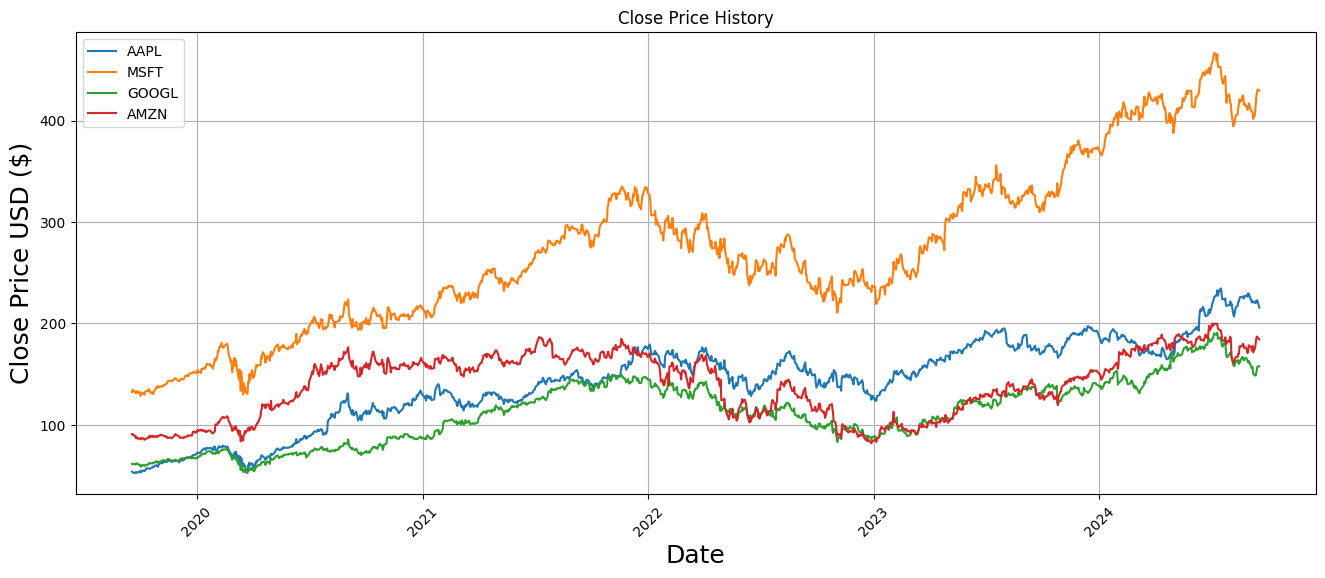

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


945/945 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0145
Epoch 2/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0017
Epoch 3/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0012
Epoch 4/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 9.1985e-04
Epoch 5/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 8.6667e-04
Epoch 6/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 8.2665e-04
Epoch 7/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 6.5328e-04
Epoch 8/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 6.9936e-04
Epoch 9/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 6.6355e-04
Epoch 10/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 6.3172e-04
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


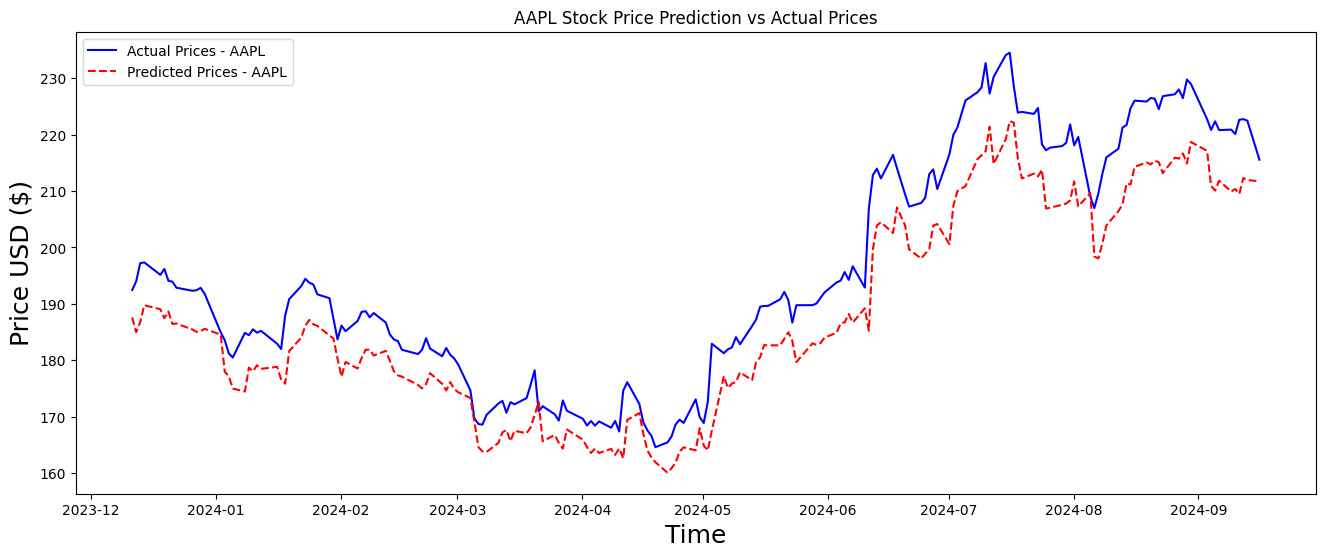

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


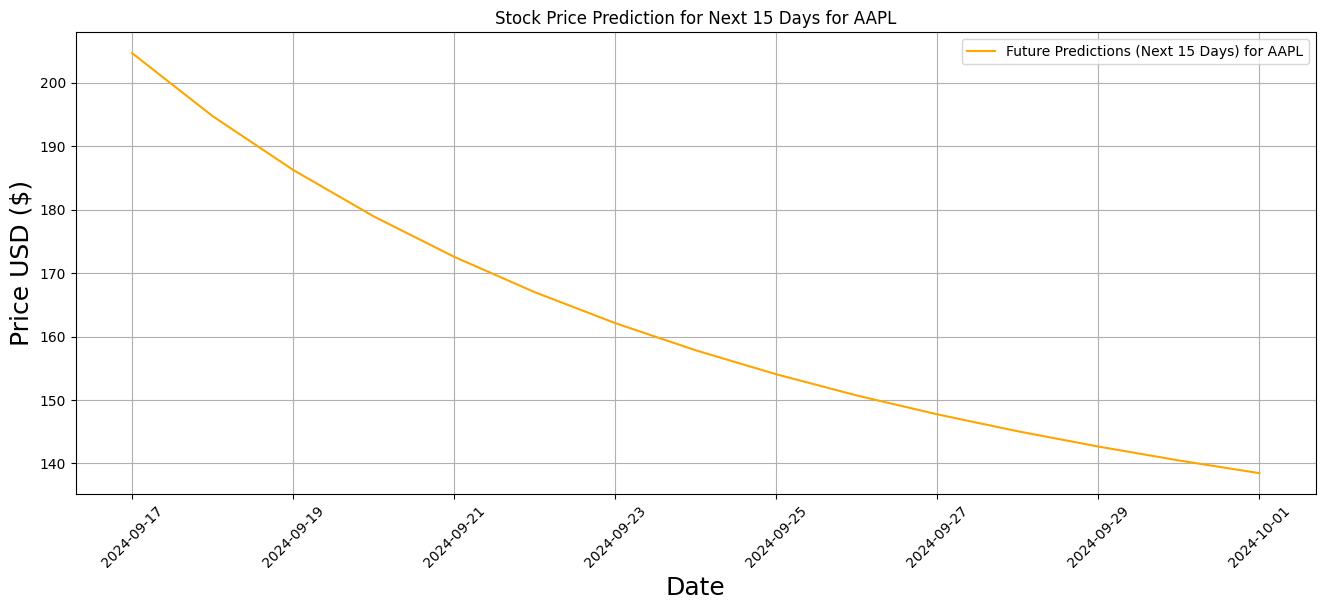

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


945/945 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0112
Epoch 2/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0016
Epoch 3/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0012
Epoch 4/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 8.7326e-04
Epoch 5/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0011
Epoch 6/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 8.1550e-04
Epoch 7/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 8.1607e-04
Epoch 8/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 7.3052e-04
Epoch 9/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 6.3673e-04
Epoch 10/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 8.5084e-04
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


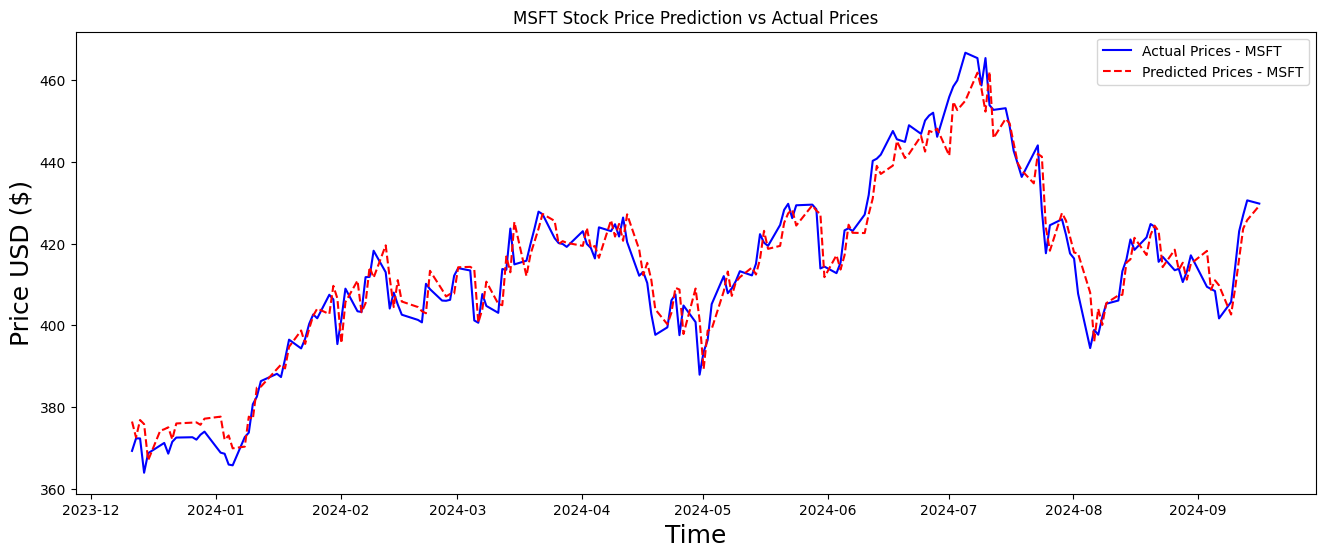

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


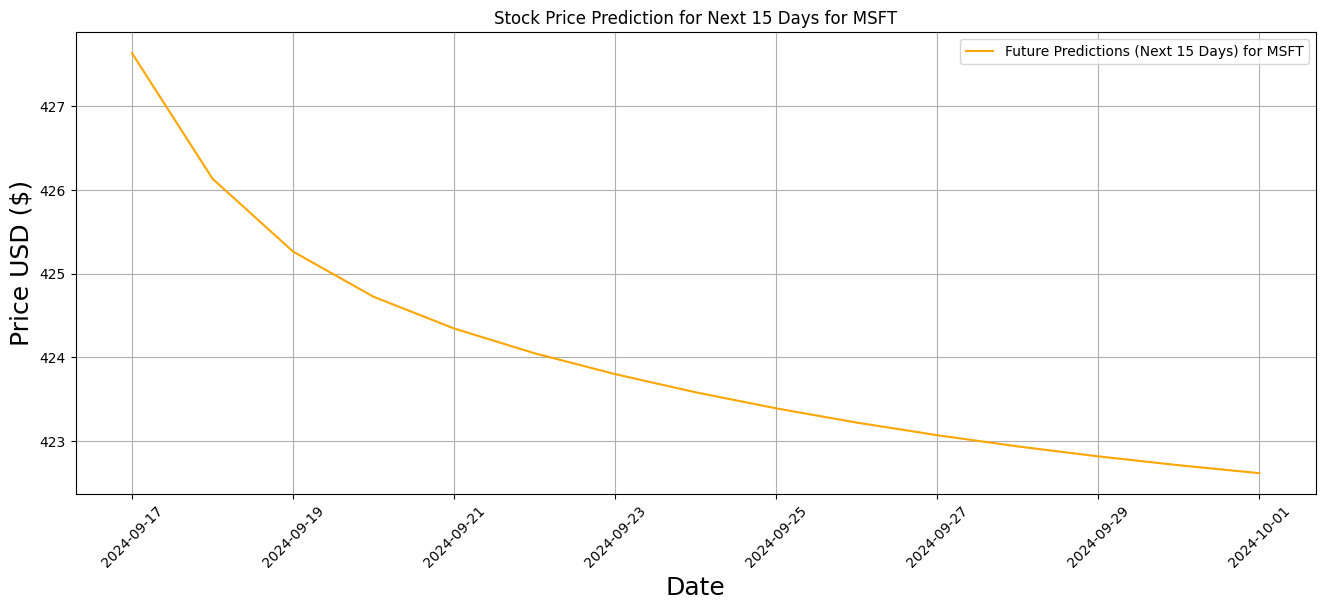

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


945/945 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0132
Epoch 2/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0024
Epoch 3/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0014
Epoch 4/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 9.8664e-04
Epoch 5/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0010
Epoch 6/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 8.3668e-04
Epoch 7/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 9.3983e-04
Epoch 8/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 7.6227e-04
Epoch 9/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 7.7116e-04
Epoch 10/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 7.8720e-04
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


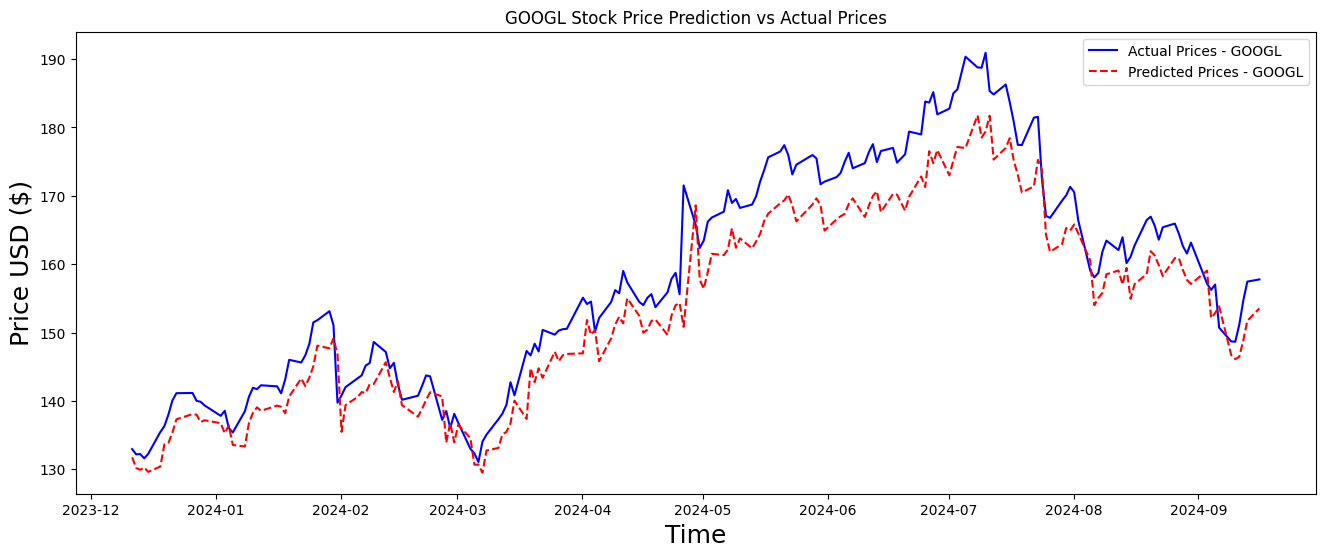

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


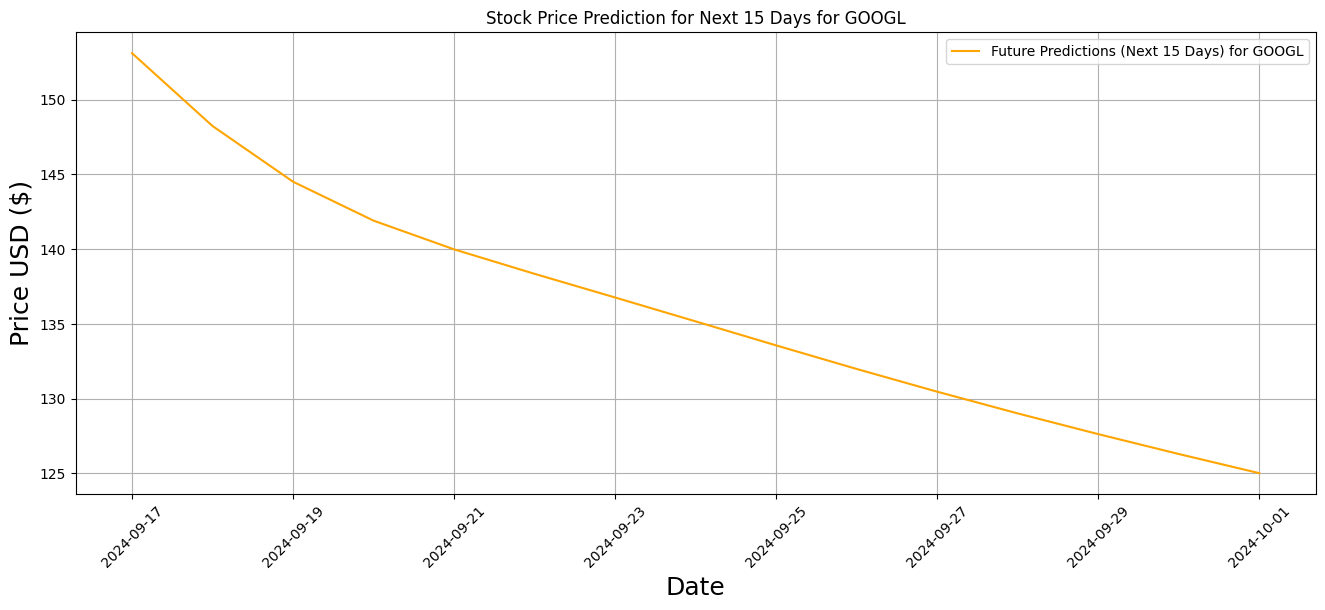

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


945/945 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0163
Epoch 2/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0025
Epoch 3/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0019
Epoch 4/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0019
Epoch 5/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0018
Epoch 6/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0012
Epoch 7/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0013
Epoch 8/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0015
Epoch 9/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0012
Epoch 10/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0014
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


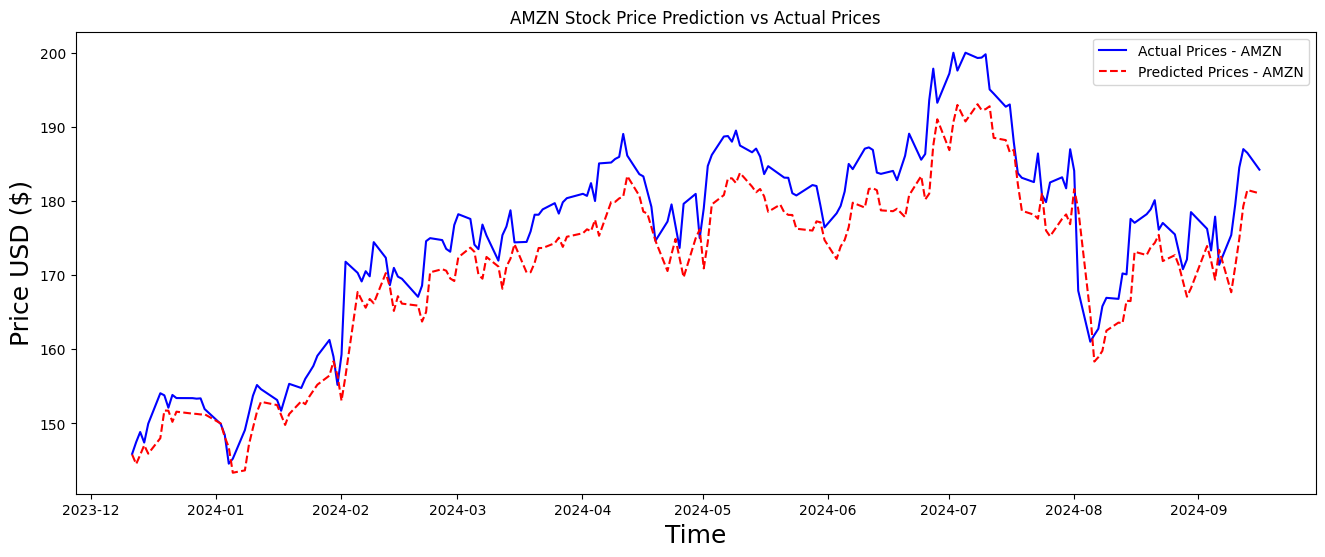

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


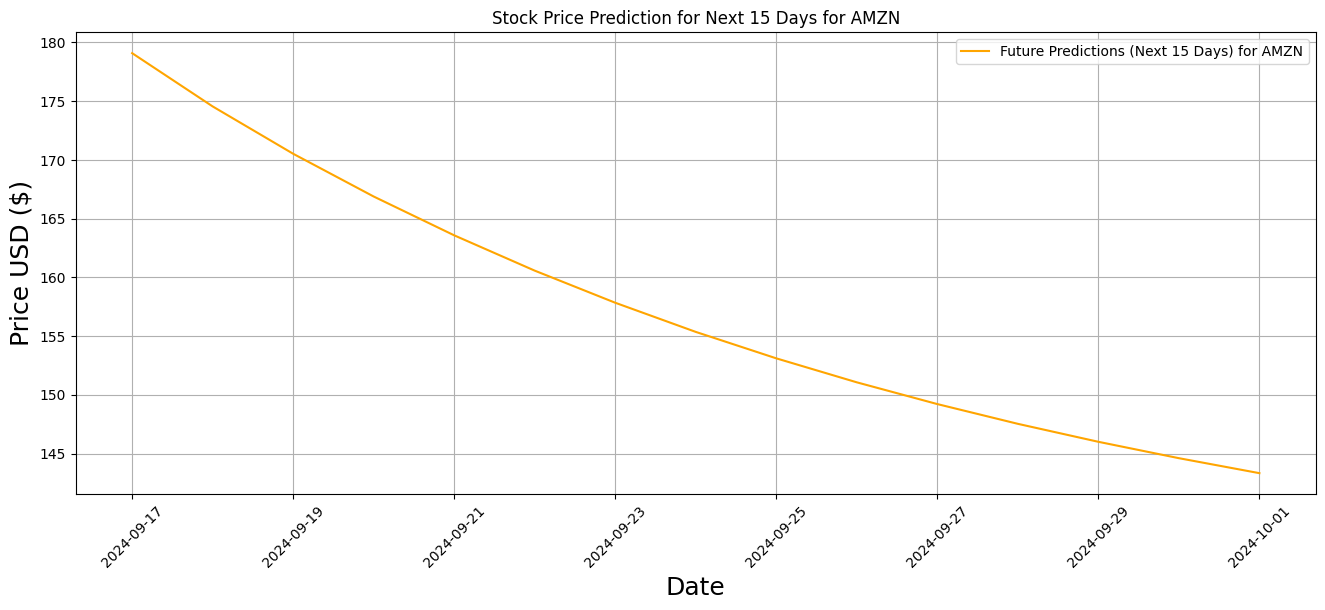

In [35]:
if __name__ == "__main__":
    input_companies = input("Enter the ticker symbols of companies (separated by commas): ").split(',')
    input_companies = [company.strip() for company in input_companies]
    
    
    analyzer = stock_prediction(input_companies)
    
    analyzer.export_data()
   
    analyzer.comparison_plot()
    analyzer.prediction_stock()

Enter company ticker symbols separated by commas:  AAPL,MSFT,GOOGL,AMZN


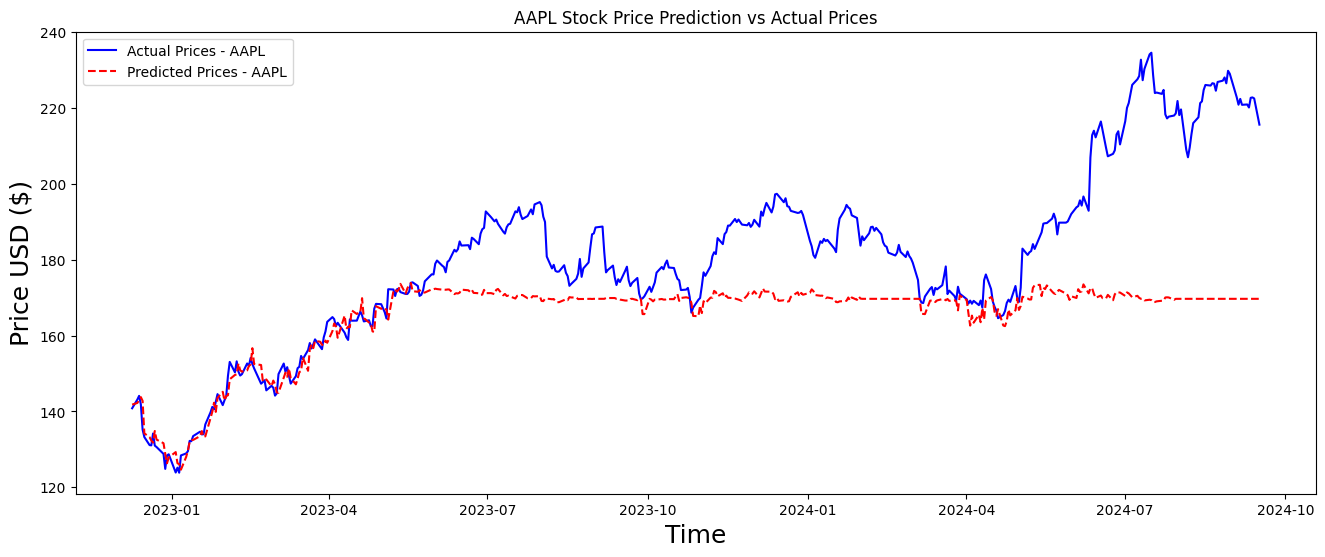

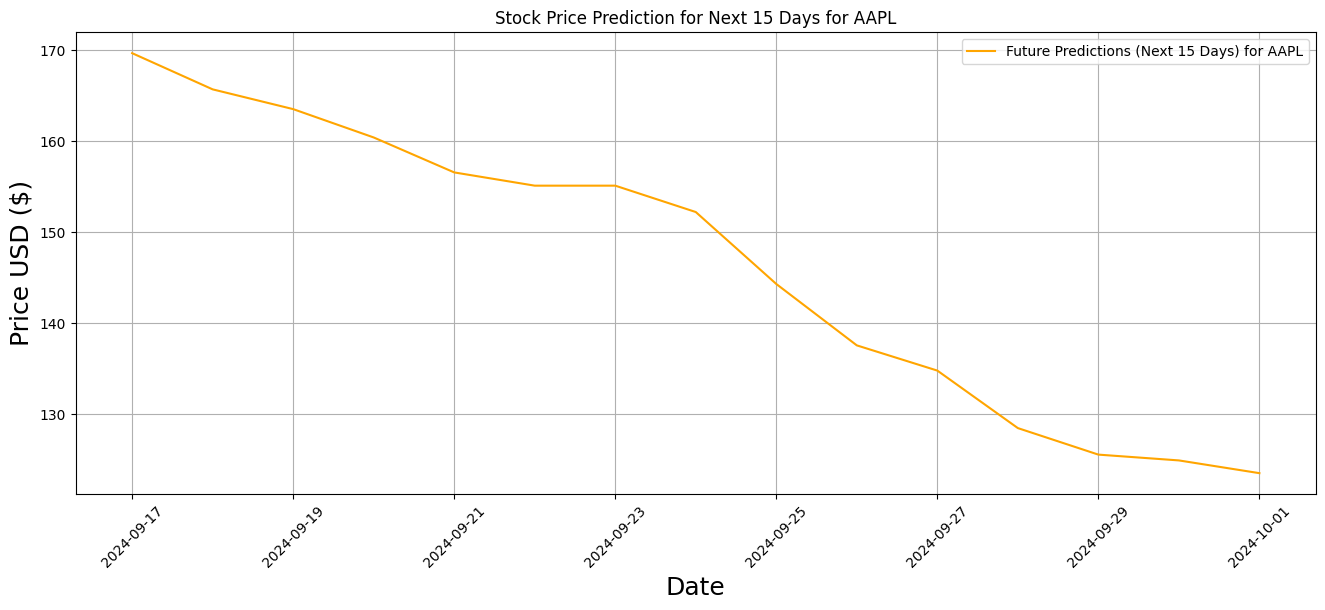

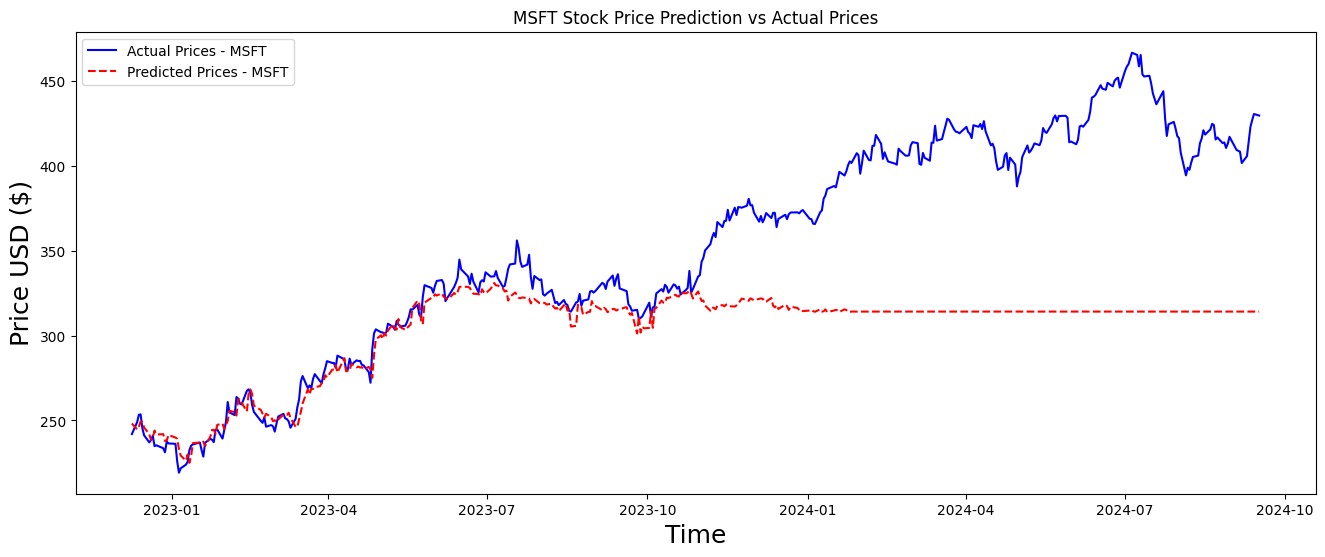

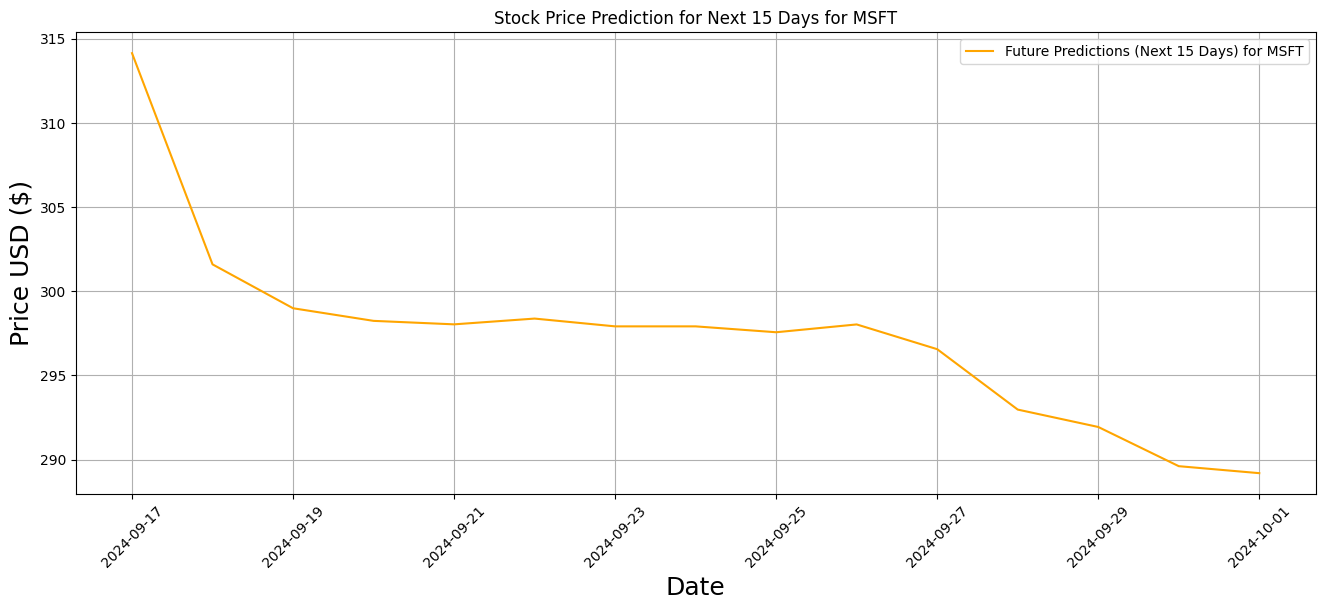

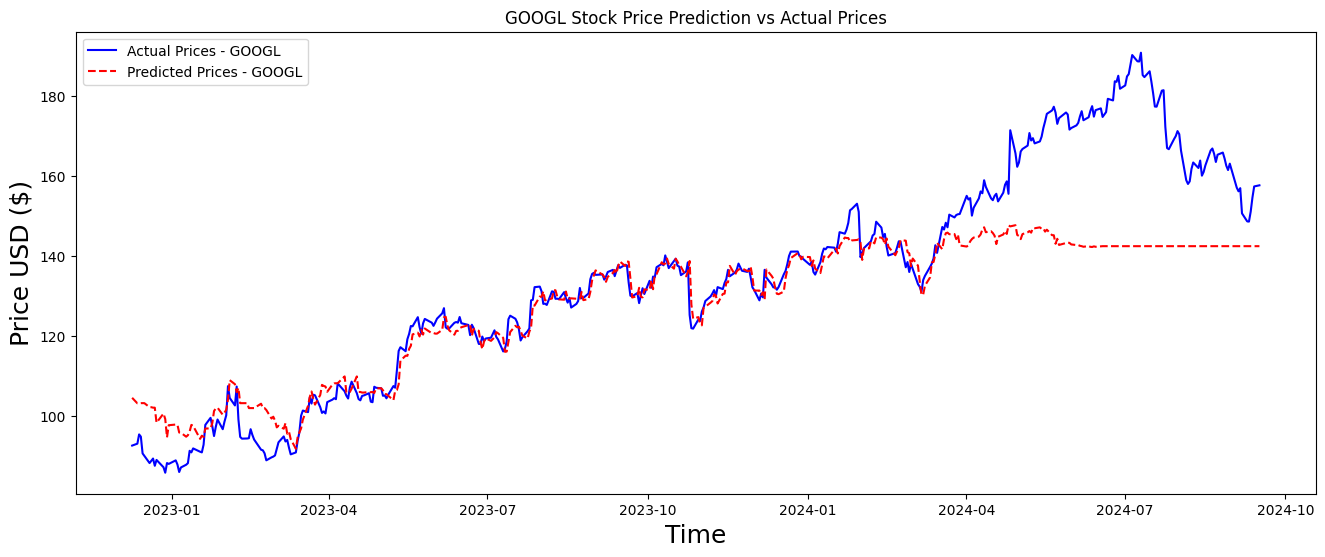

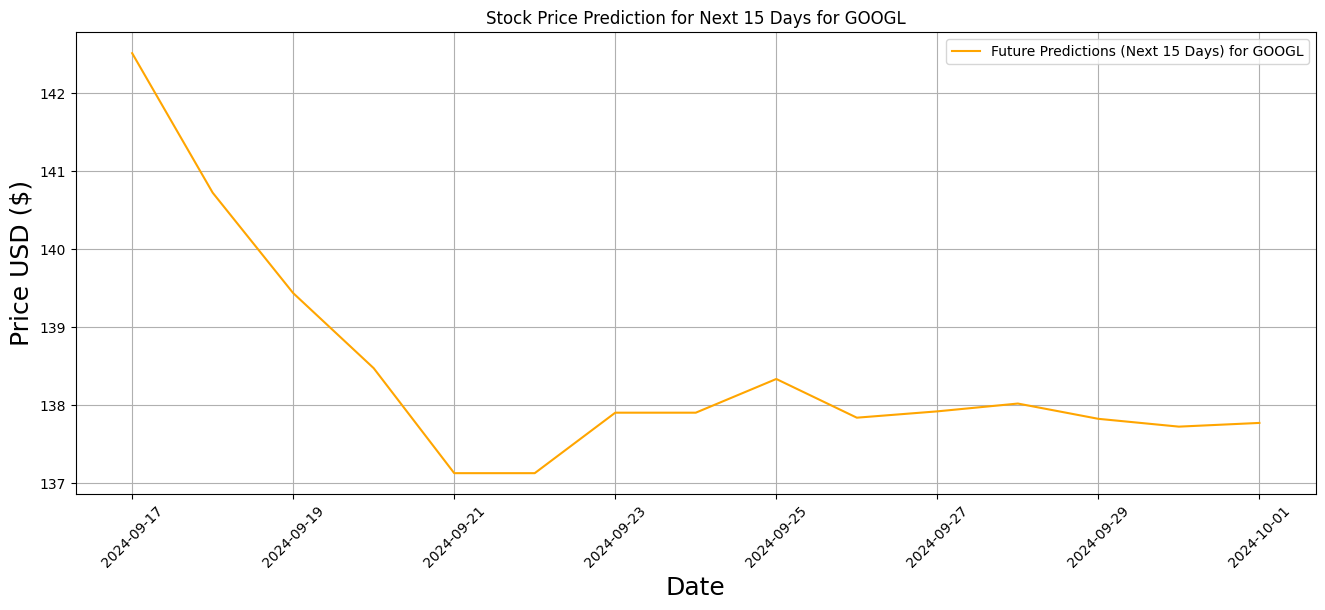

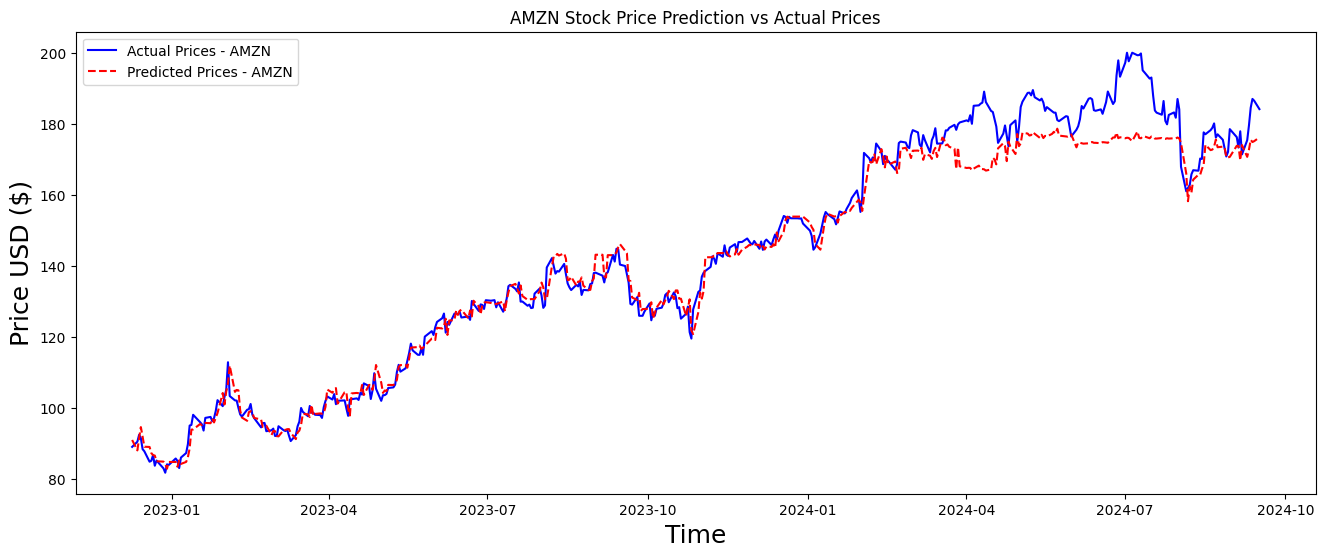

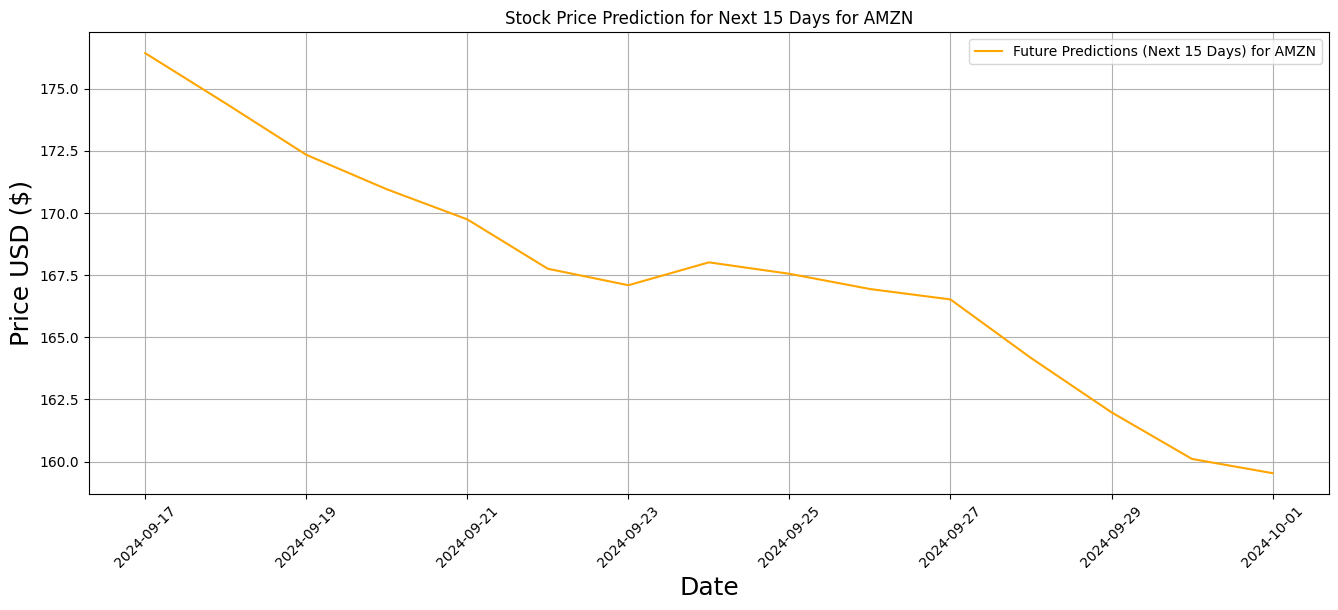

In [33]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime, timedelta

class stock_graphs:
    def __init__(self, companies):
        self.companies = companies
        self.company_data = {}

    def export_data(self):
        end_date = datetime.now()
        start_date = end_date - timedelta(days=365*10)  
        
        for company in self.companies:
            ticker = yf.Ticker(company)
            stock_data = ticker.history(start=start_date, end=end_date, interval='1d')
            self.company_data[company] = stock_data

    def prediction_stock_XG(self):
        for company in self.companies:
            combined_data = pd.DataFrame()
            data = self.company_data.get(company)
            if data is not None:
                combined_data[company] = data['Close']
    
            valid_data = combined_data.reset_index()
            valid_data.rename(columns={'index': 'Date'}, inplace=True)

            if company not in valid_data.columns:
                print(f"'{company}' column not found after reset_index")
                continue

            dataset = valid_data[company].values.reshape(-1, 1)
        
            split_idx = int(len(dataset) * 0.8)
            train_data = dataset[:split_idx]
            test_data = dataset[split_idx:]

            scaler = MinMaxScaler(feature_range=(0, 1))
            scaled_train_data = scaler.fit_transform(train_data)
            scaled_test_data = scaler.transform(test_data)

            x_train, y_train = [], []
            for i in range(60, len(scaled_train_data)):
                x_train.append(scaled_train_data[i-60:i, 0])
                y_train.append(scaled_train_data[i, 0])

            if len(x_train) == 0:
                print(f"Training data for {company} is too small. Increase the size of the dataset.")
                continue

            x_train, y_train = np.array(x_train), np.array(y_train)

            
            model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1)
            
            model.fit(x_train, y_train)

            x_test, y_test = [], []
            for i in range(60, len(scaled_test_data)):
                x_test.append(scaled_test_data[i-60:i, 0])
                y_test.append(scaled_test_data[i, 0])

            x_test, y_test = np.array(x_test), np.array(y_test)

            if x_test.shape[0] == 0:
                print(f"Not enough test data for {company} to create sequences for input. Increase the dataset size.")
                continue

            predictions = model.predict(x_test)

            predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
            y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
            test_dates = valid_data['Date'][split_idx + 60:].values
            
            plt.figure(figsize=(16,6))
            plt.plot(test_dates, y_test, label=f'Actual Prices - {company}', color='blue')
            plt.plot(test_dates, predictions, label=f'Predicted Prices - {company}', color='red', linestyle='--')
            plt.xlabel('Time', fontsize=18)
            plt.ylabel('Price USD ($)', fontsize=18)
            plt.title(f'{company} Stock Price Prediction vs Actual Prices')
            plt.legend()
            plt.show()
            
            last_60_days = scaled_test_data[-60:]  
            future_predictions = []
            predict_next_days = 15
            for day in range(predict_next_days):
                input_seq = last_60_days.reshape(1, -1)  
                next_day_prediction = model.predict(input_seq)
                next_day_prediction = np.array(next_day_prediction).reshape(1, -1)
                future_predictions.append(next_day_prediction[0,0])

                last_60_days = np.append(last_60_days[1:], next_day_prediction, axis=0)

            future_predictions = np.array(future_predictions).reshape(-1, 1)
            future_predictions = scaler.inverse_transform(future_predictions)

            last_date = pd.to_datetime(valid_data['Date'].iloc[-1])
            future_dates = [last_date + timedelta(days=i) for i in range(1, predict_next_days + 1)]

            plt.figure(figsize=(16,6))
            plt.plot(future_dates, future_predictions, label=f'Future Predictions (Next 15 Days) for {company}', color='orange')
            plt.xlabel('Date', fontsize=18)
            plt.ylabel('Price USD ($)', fontsize=18)
            plt.title(f'Stock Price Prediction for Next {predict_next_days} Days for {company}')
            plt.xticks(rotation=45)
            plt.legend()
            plt.grid(True)
            plt.show()

if __name__ == "__main__":
    input_companies = input("Enter company ticker symbols separated by commas: ").split(',')
    input_companies = [company.strip() for company in input_companies]

    analyzer = stock_graphs(input_companies)
    analyzer.export_data()
    analyzer.prediction_stock_XG()


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input
from keras import Model
from datetime import datetime, timedelta
import tensorflow as tf
from tensorflow.keras.layers import Layer

# Define the Attention Layer
class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)
        
    def build(self, input_shape):
        assert len(input_shape) == 3
        feature_dim = input_shape[2][-1]
        self.W = self.add_weight(shape=(input_shape[2][1], feature_dim),
                                 initializer='glorot_uniform',
                                 name='W')
        self.b = self.add_weight(shape=(feature_dim,),
                                 initializer='zeros',
                                 name='b')
        self.u = self.add_weight(shape=(feature_dim,),
                                 initializer='glorot_uniform',
                                 name='u')
        super(Attention, self).build(input_shape)
    
    def call(self, inputs):
    # inputs.shape == (batch_size, timesteps, features)
        seq_len = tf.shape(inputs)[1]
        scores = tf.tensordot(inputs, self.W, axes=[[2], [0]])
        scores += self.b
        scores = tf.tanh(scores)
        scores = tf.tensordot(scores, self.u, axes=[[2], [0]])
        scores = tf.nn.softmax(scores, axis=1)
        context_vector = tf.reduce_sum(inputs * tf.expand_dims(scores, -1), axis=1)
        return context_vector
    
    def compute_output_shape(self, input_shape):
        return (input_shape[0][0], input_shape[2][-1])

# Define the stock_prediction_attention class
class stock_prediction_attention:
    def __init__(self, companies):
        self.companies = companies
        self.company_data = {}
        self.start_date = datetime.now() - timedelta(days=365*2)
        self.end_date = datetime.now()

    def export_data(self):
        for company in self.companies:
            ticker = yf.Ticker(company)
            stock_data = ticker.history(start=self.start_date, end=self.end_date, interval='1d')
            self.company_data[company] = stock_data

    def create_model_with_attention(self, input_shape):
        inputs = Input(shape=input_shape)
    
        lstm_out = LSTM(128, return_sequences=True)(inputs)
        attention_out = Attention()(lstm_out)
        dense_out = Dense(64, activation='relu')(attention_out)
        output = Dense(1)(dense_out)
    
        model = Model(inputs=inputs, outputs=output)
        model.compile(optimizer='adam', loss='mean_squared_error')
    
        return model
    
    def prediction_stock_attention(self, predict_next_days=15):
        results = {}
        for company in self.companies:
            combined_data = pd.DataFrame()
            data = self.company_data.get(company)
            if data is not None:
                combined_data[company] = data['Close']

            valid_data = combined_data.reset_index()
            valid_data.rename(columns={'index': 'Date'}, inplace=True)

            if company not in valid_data.columns:
                print(f"'{company}' column not found after reset_index")
                continue

            dataset = valid_data[company].values.reshape(-1, 1)

            split_idx = int(len(dataset) * 0.8)
            train_data = dataset[:split_idx]
            test_data = dataset[split_idx:]

            scaler = MinMaxScaler(feature_range=(0, 1))
            scaled_train_data = scaler.fit_transform(train_data)
            scaled_test_data = scaler.transform(test_data)

            x_train, y_train = [], []
            for i in range(60, len(scaled_train_data)):
                x_train.append(scaled_train_data[i-60:i, 0])
                y_train.append(scaled_train_data[i, 0])

            if len(x_train) == 0:
                print(f"Training data is too small for {company}. Increase the size of the dataset.")
                continue

            x_train, y_train = np.array(x_train), np.array(y_train)
            x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

            model = self.create_model_with_attention((x_train.shape[1], 1))
            model.fit(x_train, y_train, batch_size=1, epochs=10)

            x_test, y_test = [], []
            for i in range(60, len(scaled_test_data)):
                x_test.append(scaled_test_data[i-60:i, 0])
                y_test.append(scaled_test_data[i, 0])

            x_test, y_test = np.array(x_test), np.array(y_test)

            if x_test.shape[0] == 0:
                print(f"Not enough test data for {company} to create sequences for LSTM input.")
                continue

            x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

            # Make predictions for the test set
            predictions = model.predict(x_test)
            predictions = scaler.inverse_transform(predictions)
            y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

            # Store results
            results[company] = {
                'test_dates': valid_data['Date'][split_idx + 60:].values,
                'actual_prices': y_test,
                'predicted_prices': predictions
            }

            # Forecast next 15 days
            last_60_days = scaled_test_data[-60:]
            future_predictions = []

            for day in range(predict_next_days):
                input_seq = last_60_days.reshape(1, last_60_days.shape[0], 1)
                next_day_prediction = model.predict(input_seq)
                future_predictions.append(next_day_prediction[0, 0])
                last_60_days = np.append(last_60_days[1:], next_day_prediction, axis=0)

            future_predictions = np.array(future_predictions).reshape(-1, 1)
            future_predictions = scaler.inverse_transform(future_predictions)

            last_date = pd.to_datetime(valid_data['Date'].iloc[-1])
            future_dates = [last_date + timedelta(days=i) for i in range(1, predict_next_days + 1)]

            # Store future predictions
            results[company]['future_dates'] = future_dates
            results[company]['future_predictions'] = future_predictions

            # Plot actual vs predicted prices for the test set
            plt.figure(figsize=(16,6))
            plt.plot(results[company]['test_dates'], results[company]['actual_prices'], label=f'Actual Prices ({company})')
            plt.plot(results[company]['test_dates'], results[company]['predicted_prices'], label=f'Predicted Prices ({company})')
            plt.xlabel('Date', fontsize=18)
            plt.ylabel('Price USD ($)', fontsize=18)
            plt.title(f'Stock Price Prediction vs Actual Prices for {company}')
            plt.xticks(rotation=45)
            plt.legend()
            plt.grid(True)
            plt.show()

            # Plot future predictions
            plt.figure(figsize=(16,6))
            plt.plot(results[company]['future_dates'], results[company]['future_predictions'], label=f'Future Predictions (Next 15 Days) for {company}', color='orange')
            plt.xlabel('Date', fontsize=18)
            plt.ylabel('Price USD ($)', fontsize=18)
            plt.title(f'Stock Price Prediction for Next {predict_next_days} Days for {company}')
            plt.xticks(rotation=45)
            plt.legend()
            plt.grid(True)
            plt.show()

        return results

# Main script execution
if __name__ == "__main__":
    input_companies = input("Enter company ticker symbols separated by commas: ").split(',')
    input_companies = [company.strip() for company in input_companies]

    analyzer = stock_prediction_attention(input_companies)
    analyzer.export_data()
    results = analyzer.prediction_stock_attention()

    # Print or use the results as needed
    for company, data in results.items():
        print(f"Company: {company}")
        print("Test Dates:", data['test_dates'])
        print("Actual Prices:", data['actual_prices'])
        print("Predicted Prices:", data['predicted_prices'])
        print("Future Dates:", data['future_dates'])
        print("Future Predictions:", data['future_predictions'])


Enter company ticker symbols separated by commas:  AAPL,MSFT,GOOGL,AMZN


TypeError: 'int' object is not subscriptable

In [46]:
if __name__ == "__main__":
    input_companies = input("Enter company ticker symbols separated by commas: ").split(',')
    input_companies = [company.strip() for company in input_companies]

    analyzer = stock_prediction_attention(input_companies)
    analyzer.export_data()
    analyzer.prediction_stock_attention()

Enter company ticker symbols separated by commas:  AAPL,MSFT,GOOGL,AMZN


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


NameError: name 'lstm_out' is not defined